In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualize data

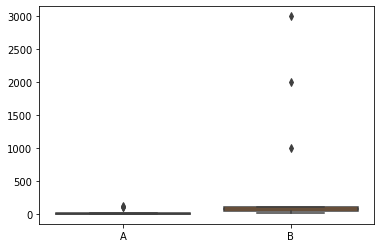

In [2]:
# create a dataframe with some outliers
df = pd.DataFrame({
    'A' : [1,2,3,4,5,6,7,8,9,10,100,110,120],
    'B' : [20,30,40,50,60,70,80,90,100,110,1000,2000,3000]
})

sns.boxplot(data=df)
plt.show()

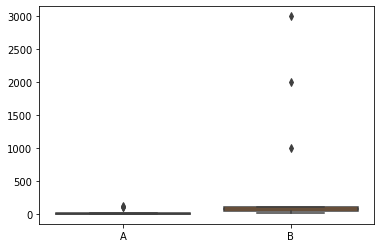

In [3]:
sns.boxplot(df)
plt.show()

## Calculate summary statistics

In [4]:
mean_a = df['A'].mean()
std_dev_a = df['A'].std()
mean_b = df['B'].mean()
std_dev_b = df['B'].std()

print("Column A mean:", mean_a)
print("Column A standard deviation:", std_dev_a)
print("Column B mean:", mean_b)
print("Column B standard deviation:", std_dev_b)

Column A mean: 29.615384615384617
Column A standard deviation: 46.082423369325355
Column B mean: 511.53846153846155
Column B standard deviation: 942.0177471244563


## Perform test statistics

In [8]:
df

,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


## Trimming method

In [7]:
# Trimming method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_trim = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_trim

,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


In [ ]:
# Winsorization method
df_wins = df.copy()
df_wins['A'] = np.where(df_wins['A'] > Q3['A'], Q3['A'])